In [183]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
from tqdm.auto import tqdm
import concurrent.futures
from multiprocessing import Pool
import copy,os,sys
from collections import Counter,deque
import matplotlib.pyplot as plt
import json
import functools
import itertools
import math

In [184]:
import tensorflow as tf
from tensorflow import feature_column
tf.__version__
tf.get_logger().setLevel(tf.logging.ERROR)
import numpy as np
import pandas as pd
from glob import glob

'1.15.4'

In [185]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # 禁用GPU

In [211]:
pd.read_csv("/Users/zac/Downloads/goods_wieght_volume_addCode_rename.csv",sep="\t")["sale"].sum()

354102162.0

In [219]:
354102162.0

354102162.0

In [221]:
s = 0
for idx,i in enumerate(pd.read_csv("/Users/zac/Downloads/goods_wieght_volume_addCode_rename.csv",sep="\t")["sale"].to_list()):
    s = s+i
    if s / 354102162.0 >= 0.41:
        print(idx)
        print(s)
        print(i)
        break

1033
145189576.0
61329.0


# Data

## Analysis

In [ ]:
df = pd.read_csv("/Users/didi/Downloads/group_line_data.csv",sep="\t")

In [ ]:
df["vl_volume"].describe()
df["vl_volume"].apply(lambda x: 100 if x>=100 else x).hist(bins=50)

In [ ]:
df["vl_capacity"].describe()
df["vl_capacity"].apply(lambda x: 100 if x>=100 else x).hist(bins=200)

In [ ]:
df["sku_cnt"].describe()
df["sku_cnt"].apply(lambda x: 100 if x>=100 else x).hist(bins=200)

In [ ]:
df["user_cnt"].describe()
df["user_cnt"].apply(lambda x: 100 if x>=100 else x).hist(bins=200)

In [ ]:
df["num_sum"].describe()
df["num_sum"].apply(lambda x: 100 if x>=100 else x).hist(bins=50)

In [ ]:
import datetime
help(datetime)
datetime.isoformat("2020-10-29")

In [ ]:
time_str="2020-12-02 07:18:55"
datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S').timestamp()

In [ ]:
df["tocar_time"].describe()
def time_format(time_str):
    try:
        datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
    except Exception:
        
df["tocar_time"].apply(lambda x: ).head(3)



## simulation | numeric

In [ ]:
np.random.seed(2020)
def gen_func(x1,x2,x3):
    y = 20*x1**3 + 10*x2*x2 + 5*x3 + 7
    return y

X = np.random.random((50,3))
Y = np.apply_along_axis(lambda x: gen_func(*x), axis=1, arr=X)

features = {}
features["x0"] = X[:,0]
features["x1"] = X[:,1]
features["x2"] = X[:,2]
features["y"] = np.where(Y>20,1,0)

pd.DataFrame({k:v.tolist() for k,v in features.items()}).head(3)

tf.reset_default_graph()  # required

fc_numeric = list()
fc_numeric.append(feature_column.numeric_column("x0", default_value=0))
fc_numeric.append(feature_column.numeric_column("x1", default_value=0))
fc_numeric.append(feature_column.numeric_column("x2", default_value=0))

# tf.estimator.LinearRegressor(feature_columns=fc_numeric)
labels = np.expand_dims(features["y"], -1)
inp = feature_column.input_layer(features, fc_numeric)
lr_logits = tf.layers.dense(inp, 1, activation=tf.sigmoid)
loss = tf.losses.sigmoid_cross_entropy(labels, lr_logits)
opt = tf.train.AdagradOptimizer(1e-3)
opt.minimize(loss)

In [ ]:
tf.estimator.LinearRegressor

## simulation | trd

In [ ]:
np.random.seed(2020)
num_buckets_deep=7
dims_embs_deep=4
_batch_size=2

# features
features = {}
features["featA"] = np.random.randint(num_buckets_deep, size=(_batch_size, 1))
features["featB"] = np.random.randint(num_buckets_deep, size=(_batch_size, 1))
features["featC"] = np.random.randint(num_buckets_deep, size=(_batch_size, 1))
features["featD"] = np.random.randint(num_buckets_deep, size=(_batch_size, 1))
features["featE"] = np.random.randint(num_buckets_deep, size=(_batch_size, 1))
features["numA"] = np.random.random((_batch_size,1))
features["numB"] = np.random.random((_batch_size,1))
features["wideFeatures"] = np.random.randint(100, size=(_batch_size, 4))
# features
pd.DataFrame({k:v.tolist() for k,v in features.items()})

## simulation | titanic

In [ ]:
####################
# for massive data | not-yet
# trainIterDF = pd.read_csv("/Users/zac/Downloads/titanic_train.csv", 
#                           chunksize=16, dtype=str, converters={'age':float, 'fare':float})
# evalIterDF = pd.read_csv("/Users/zac/Downloads/titanic_eval.csv", 
#                          chunksize=16, dtype=str, converters={'age':float, 'fare':float})

# def genIter(n=10):
#     inp = trainIterDF.read(n)
#     feats,lbls = (inp, inp.pop("survived"))
#     feats = feats.to_dict('list')
#     lbls = np.expand_dims(np.array(lbls),-1)
#     yield (feats,lbls)
######################

In [ ]:
pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv').to_csv("/Users/zac/Downloads/titanic_train.csv")
pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv').to_csv("/Users/zac/Downloads/titanic_eval.csv")


In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
EMB_COLUMNS = ['sex', 'n_siblings_spouses']
CATEGORICAL_COLUMNS = ['parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']


In [ ]:
trainDF = pd.read_csv("/Users/zac/Downloads/titanic_train.csv", dtype=str, converters={'age':float, 'fare':float, 'survived':int})
evalDF = pd.read_csv("/Users/zac/Downloads/titanic_eval.csv", dtype=str, converters={'age':float, 'fare':float, 'survived':int})


# for custom | not-yet as GBDT?
def getIter(data_df, label_col="survived", mode=None):
    ds = tf.data.Dataset.from_tensor_slices((data_df.to_dict('list'), data_df[label_col]))
    ds = ds.batch(16).repeat(1)
    
    if mode is not None and mode.upper() == "EXP":
        iterator = ds.make_initializable_iterator()
        feats,lbls = iterator.get_next()
        lbls = tf.expand_dims(lbls,-1)
        return (feats,lbls), iterator.initializer
    
    iterator = ds.make_one_shot_iterator()
    feats,lbls = iterator.get_next()
    lbls = tf.expand_dims(lbls,-1)
    return (feats,lbls)

# trainData = getIter(trainDF)
# evData = getIter(evalDF)
# evData,evInit = getIter(evalDF,mode="EXP")
# train_input_fn = functools.partial(getIter, trainDF)
# eval_input_fn = functools.partial(getIter, evalDF)


## ING

In [ ]:
from glob import glob
df = pd.concat([pd.read_csv(i) for i in glob("/Users/zac/Downloads/vl_regression.csv/part-*")], ignore_index=True)
df['vl_volume'] = df['vl_volume'].astype(np.float32)
def bucketize(ser):
    holds = ser.quantile([.25, .35, .5, .75, .95]).values
    holds
    def _bucketize(x):
        for idx, i in enumerate(holds):
            if x <= i:
                return idx
        return len(holds)
    return ser.apply(_bucketize)

df.head(3)
# df['num_sum1'] = bucketize(df['num_sum1'])
# df['sku_cnt'] = bucketize(df['sku_cnt'])
df.head(3)

trainDF = df.query("dt<='2020-12-28'")
evalDF = df.query("dt>='2020-12-28'")

trainDF.shape
evalDF.shape

In [ ]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

evalDF.groupby("vl_type").agg({"vl_volume":["count",min,"mean",max]})
evalDF.groupby("vl_type").agg({"num_sum1":[min,percentile(10),percentile(90),max]})

# evalDF.plot(subplots=True,kind='hist',y='vl_volume')
for idx,(k,g) in enumerate(evalDF.groupby("vl_type")):
    g.plot(title=k,kind='hist',y='vl_volume')
#     g['vl_volume'].plot.hist(tag=k)


# parse_fn

## schem verification

In [156]:
trd_fp = glob("/Users/zac/Downloads/cleanInfo_trd_train/*.tfrecord.gz")
trd=tf.data.TFRecordDataset(trd_fp,compression_type='GZIP')
iterator=trd.make_one_shot_iterator()
one=iterator.get_next()
res = []
with tf.Session() as sess:
    one_ = sess.run(one)
    featInfo = tf.train.Example.FromString(one_).features.feature # not dict
    for key in featInfo:
        info_list=[(key, attr, featInfo[key].__getattribute__(attr).value) for attr in ["bytes_list","float_list","int64_list"]]
        info = [i for i in info_list if i[-1] != []][0] # 只应该有一个
        info = list(info)
        info[-1] = "[%s ...] | len=%s" % (", ".join(map(str,info[-1][:4])), len(info[-1]))
        res.append("[featName]:{} [type]:{} [value_example]:{}".format(*info))

print("\n".join(sorted(res)))


[featName]:categoryIds_indices [type]:bytes_list [value_example]:[b'1066', b'1068', b'1070', b'1072' ...] | len=13
[featName]:categoryIds_values [type]:float_list [value_example]:[106.0, 194.0, 18.0, 63.0 ...] | len=13
[featName]:specInfo_indices [type]:bytes_list [value_example]:[b'28268_500g/\xe4\xbb\xbd', b'27774_400g/\xe8\xa2\x8b', b'27616_100g/\xe4\xbb\xbd', b'6713_200*200mm/\xe5\x8c\x85' ...] | len=365
[featName]:specInfo_values [type]:float_list [value_example]:[1.0, 1.0, 1.0, 2.0 ...] | len=365
[featName]:vl_capacity [type]:bytes_list [value_example]:[b'11' ...] | len=1
[featName]:vl_type [type]:bytes_list [value_example]:[b'MIDSIZE_CAR' ...] | len=1
[featName]:vl_volume [type]:bytes_list [value_example]:[b'79' ...] | len=1


## load_ds_fn | iterator load

In [157]:
trd_train_fp = glob("/Users/zac/Downloads/cleanInfo_trd_train/*.tfrecord.gz")  # 6478
trd_test_fp = glob("/Users/zac/Downloads/cleanInfo_trd_test/*.tfrecord.gz")    # 1291

VL_TYPES = ["SMALL_CAR","MIDSIZE_CAR","LARGE_CAR","VAN_TYPE"]
LBL_WEIGHTS = [2.0,3.0,1.0,1.0]
cls_labeler = lambda x: tf.where(tf.equal(x, VL_TYPES))

features_schema={
    "vl_type":tf.io.FixedLenFeature([], tf.string),
    "vl_volume":tf.io.FixedLenFeature([], tf.string),
    "categoryIds_indices":tf.io.VarLenFeature(tf.string),
    "categoryIds_values":tf.io.VarLenFeature(tf.float32),
    "specInfo_indices":tf.io.VarLenFeature(tf.string),
    "specInfo_values":tf.io.VarLenFeature(tf.float32),
}

def _parse_func(model_type, inp):
    parsed_features = tf.io.parse_single_example(inp,features_schema)
    if model_type.lower() == "reg":
        # regression
        label = tf.strings.to_number(parsed_features["vl_volume"],tf.float32)
        labels = tf.expand_dims(label, -1)
    elif model_type.lower() == "cls":
        # classify
        label = parsed_features["vl_type"]
        label = tf.reduce_min(tf.where(tf.equal(label, VL_TYPES)))
        labels = tf.expand_dims(label, -1)
        parsed_features["weights"] = tf.squeeze(tf.gather(LBL_WEIGHTS,label))
    return (parsed_features,labels)

def load_ds(trd_fp, mode, batch_size=1024, epoch_num=10, model_type="reg"):
    _partial_parse_func = functools.partial(_parse_func,model_type)
    
    ds = tf.data.TFRecordDataset(trd_fp,compression_type='GZIP')
    ds = ds.map(_partial_parse_func).shuffle(True)
    if mode.lower() == "train":
        ds = ds.batch(batch_size,drop_remainder=False).repeat(epoch_num)
        iterator = ds.make_one_shot_iterator()
        return iterator.get_next()
    elif mode.lower() == "test":
        ds = ds.batch(batch_size,drop_remainder=False).repeat(1)
        iterator = ds.make_one_shot_iterator()
        return iterator.get_next()
    elif mode.lower() == "exp":
        ds = ds.batch(batch_size,drop_remainder=False).repeat(1)
        iterator = ds.make_initializable_iterator()
        return iterator.get_next(), iterator.initializer
    else:
        raise


if False:
    trainData=load_ds(trd_test_fp,"train",model_type="cls",epoch_num=2)
    to_print = ["weights","vl_type","specInfo_values"]
    with tf.Session() as sess:
        i = sess.run(trainData)
        feat = i[0]
        label = i[1]
        print(">>> all keys: {}\n".format(",".join(feat.keys())))
        print(">>> labels: [{}...]".format(", ".join(map(str,label[:4]))))
        print(">>> labels distrib: {}\n".format(np.unique(label,return_counts=True)))
        print(">>> label-shape: {}\n".format(label.shape))
        for key in to_print:
            print(">>> {}:".format(key))
            print(feat[key][:4])

        try:
            with tqdm(desc="batch") as pbar:
                while True:
                    _ = sess.run(trainData)
                    pbar.update()
        except tf.errors.OutOfRangeError:
            pass
                
    
        
        

## wrapper_fc_list | feature_column

In [163]:
# 为了配合reset graph ，它必须在reset之后执行，但是不想写成一坨
def wrapper_fc_list(specInfo_hashBucket=3200):
    fc_list = list()
#     categoryID_weighted = feature_column.weighted_categorical_column(categorical_column=feature_column.categorical_column_with_hash_bucket("categoryIds_indices",20),
#                                                                      weight_feature_key='categoryIds_values')
#     fc_list.append(feature_column.indicator_column(categoryID_weighted))

    specInfo_weighted = feature_column.weighted_categorical_column(categorical_column=feature_column.categorical_column_with_hash_bucket("specInfo_indices",specInfo_hashBucket), 
                                                                   weight_feature_key='specInfo_values')
    fc_list.append(feature_column.indicator_column(specInfo_weighted))

    return fc_list

# LR/NN | Custom

##  model_fn

In [ ]:
MODEL_TYPE="cls"
BATCH_SIZE=1024
LOSS_TYPE="CE_W"

In [ ]:
tf.reset_default_graph()

def my_loss_fn(kind,labels,preds,**kwargs):
    if kind.upper() == "RMSE":
        loss = tf.losses.mean_squared_error(labels,preds,reduction=tf.losses.Reduction.MEAN)
        loss = tf.sqrt(loss)
    elif kind.upper() == "CE_W":
        weights = tf.squeeze(tf.gather(LBL_WEIGHTS,labels))
        loss = tf.losses.sparse_softmax_cross_entropy(labels,preds,weights)
    elif kind.upper() == "CE":
        loss = tf.losses.sparse_softmax_cross_entropy(labels,preds)
    elif kind.upper() == "MAPE":
        _loss_each = tf.sqrt(tf.math.pow(labels - preds,2))/labels
        loss = tf.reduce_mean(_loss_each)
    else:
        raise
    return loss

output_shape = len(VL_TYPES) if MODEL_TYPE.lower() == "cls" else 1
loss_fn = functools.partial(my_loss_fn,LOSS_TYPE)
logits_activation = None if MODEL_TYPE.lower()=="cls" else tf.nn.relu
fc_list = wrapper_fc_list()


def model_fn(features,lbls,fc_list,mode):
    net_inp = feature_column.input_layer(features,fc_list)
    net = net_inp
#     net = tf.layers.dense(net_inp,128,activation=tf.nn.sigmoid,reuse=tf.AUTO_REUSE,name="l1")
#     net = tf.layers.dense(net_inp,32,activation=tf.nn.sigmoid,reuse=tf.AUTO_REUSE,name="l2")
    logits = tf.layers.dense(net,output_shape,activation=logits_activation,reuse=tf.AUTO_REUSE,name="logits")
#     initA = tf.constant_initializer(np.random.random(size=[net.shape[1],1])*0.1, verify_shape=True)
#     logits = tf.layers.dense(net,1,activation=tf.nn.relu,
#                              reuse=tf.AUTO_REUSE,
#                              kernel_initializer=initA,
#                              kernel_constraint=tf.keras.constraints.NonNeg(),
#                              name="logits") 

    if mode.lower() == "predict":
        with tf.variable_scope("predict", reuse=tf.AUTO_REUSE):
            predictions = {"logits":logits, "labels":lbls}
            return tf.estimator.EstimatorSpec(mode=mode,
                                              predictions=predictions)
    elif mode.lower() == "eval":
        with tf.variable_scope("eval", reuse=tf.AUTO_REUSE):
            loss = loss_fn(labels=lbls,preds=logits)
            predictions = {"loss":loss, "logits":logits, "labels":lbls}
            return tf.estimator.EstimatorSpec(mode=mode,
                                              loss=loss,
                                              predictions=predictions)
    elif mode.lower() == "train":
        with tf.variable_scope("train", reuse=tf.AUTO_REUSE):
            loss = loss_fn(labels=lbls,preds=logits)
            optimizer = tf.train.AdamOptimizer(1e-1)
            opt = optimizer.minimize(loss)
            return tf.estimator.EstimatorSpec(mode=mode,
                                              loss=loss,
                                              train_op=opt)
    elif mode.lower() == "testonly":
         return my_loss_fn(labels=lbls,preds=logits,kind="CE_W")
    else:
        assert False,"mode is %s" % mode
    

trainData,trainDataInit=load_ds(trd_train_fp,"exp",batch_size=BATCH_SIZE,model_type=MODEL_TYPE)
evalData,evalInit=load_ds(trd_test_fp,"exp",batch_size=BATCH_SIZE*10,model_type=MODEL_TYPE)

train_spec = model_fn(trainData[0],trainData[1],fc_list,"train")
_ = tf.get_variable_scope().reuse_variables()
eval_spec = model_fn(evalData[0],evalData[1],fc_list,"eval")
predict_spec = model_fn(evalData[0],evalData[1],fc_list,"predict")

test_res = model_fn(evalData[0],evalData[1],fc_list,"testOnly")

tf.trainable_variables()


## exec_debug

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    
    sess.run(evalInit)
    print(">>> test_res: {}".format(test_res.eval()))
    
    print(">>> predictions")
    sess.run(evalInit)
    pred = sess.run(eval_spec.predictions)
    print("loss:  ",pred['loss'])
    print("logits:",pred['logits'][0])
    print("labels:",pred['labels'][0])
    
    print(">>> logits/kernel")
    tf.get_default_graph().get_tensor_by_name("logits/kernel:0").eval()[:10]
    
    

## exec

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    loss_train_list = []
    loss_eval_list = []
    step = 0
    for i in tqdm(range(10)):
        sess.run(tf.local_variables_initializer())
        sess.run(trainDataInit)
        try:
            with tqdm(leave=False) as pbar:
                while True:
                    if step % 2 == 0:
#                         head5=tf.get_default_graph().get_tensor_by_name("logits/kernel:0").eval()[:5]
#                         kernel_mean = np.mean(tf.get_default_graph().get_tensor_by_name("logits/kernel:0").eval())
#                         print("logits/kernel: [mean]:{}".format(kernel_mean))
#                         print(",".join(map(str,head5)))
                        pass
                    _,_loss_train = sess.run([train_spec.train_op, train_spec.loss])
                    loss_train_list.append({"step":step,"{}_train".format(LOSS_TYPE):_loss_train})
                    if step%10 == 0:
                        try:
                            sess.run(evalInit)
                            _loss_eval,pred = sess.run([eval_spec.loss,eval_spec.predictions])
                            loss_eval_list.append({"step":step,"{}_test".format(LOSS_TYPE):_loss_eval})
#                             print("\n[predictions_mean]:{:.4f}".format(np.mean(pred['logits'])))
#                             print("[loss]",pred["loss"])
#                             print("[logits]",",".join(map(str,pred["logits"][10:15])))
#                             print("[labels]",",".join(map(str,pred["labels"][10:15])))
#                             print("[logits]",",".join(map(str,pred["logits"][-5:])))
#                             print("[labels]",",".join(map(str,pred["labels"][-5:])))
                        except tf.errors.OutOfRangeError:
                            pass
                    pbar.update()
                    step = step+1
        except tf.errors.OutOfRangeError:
            pass
#             print("done")
        

## visualize

### metrics of test

In [ ]:
print("logits, labels 分布")
fig,axes=plt.subplots(2,1)
cur_axe=axes.flatten()[0]
cur_axe.title.set_text("labels")
pd.Series(pred["labels"].flatten()).hist(bins=100, ax=cur_axe)

cur_axe=axes.flatten()[1]
cur_axe.title.set_text("logits")
logits_processed=np.argmax(pred["logits"],axis=1) if MODEL_TYPE.lower() == "cls" else pred["logits"]
pd.Series(logits_processed).hist(bins=100, ax=cur_axe)

In [ ]:
infoDF = pd.DataFrame({'labels':pred['labels'].flatten(),
                       'logits':np.argmax(pred['logits'],axis=1).flatten()})

for k,g in infoDF.groupby("labels"):
    head="acc_{}".format(k)
    detail="{}/{}".format(g.query("logits == labels").shape[0],g.shape[0])
    res=g.query("logits == labels").shape[0]/g.shape[0]
    print("{}: {}={:.4f}".format(head,detail,res))
    
    

### loss of test

In [ ]:
resDF = pd.DataFrame(loss_train_list).merge(pd.DataFrame(loss_eval_list),on="step",how="left")
# resDF.head(3)
resDF.interpolate(method='linear').plot(subplots=True, x="step",y=['{}_train'.format(LOSS_TYPE),'{}_test'.format(LOSS_TYPE)])


# LR | Linear Official

In [87]:
fc_list = wrapper_fc_list()
train_input_fn = lambda : load_ds(trd_train_fp,"train",epoch_num=5,model_type="cls")
eval_input_fn = lambda : load_ds(trd_test_fp,"test",epoch_num=1,model_type="cls")

In [88]:
linear_est = tf.estimator.LinearClassifier(feature_columns=fc_list,n_classes=len(VL_TYPES))
_ = linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result)

{'accuracy': 0.6366907, 'average_loss': 10.433507, 'loss': 8701.545, 'global_step': 15}


In [106]:
preds = []
for i in linear_est.predict(eval_input_fn,predict_keys=["probabilities","class_ids"],yield_single_examples=True):
    i['probabilities'] = np.max(i['probabilities'])
    i['class_ids'] = i['class_ids'][0]
    preds.append(i)

lbls=[]
with tf.Session() as sess:
    try:
        lbls.append(eval_input_fn()[1].eval().flatten())
    except tf.errors.OutOfRangeError:
        pass

lbls = np.hstack(lbls)

resDF = pd.DataFrame(preds)
resDF['labels'] = lbls
resDF.value_counts('class_ids')
resDF.value_counts('labels')

class_ids
1    612
0    222
dtype: int64

labels
1    686
0    101
3     24
2     23
dtype: int64

# GBDT+FM

## ~GBDT from tensorflow~ | Failed
会报错`ValueError: Cannot infer num from shape (?, ?)` 不明原因

In [107]:
fc_list = wrapper_fc_list()
train_input_fn = lambda : load_ds(trd_train_fp,"train",epoch_num=5,model_type="cls")
eval_input_fn = lambda : load_ds(trd_test_fp,"test",epoch_num=1,model_type="cls")

In [118]:
params = {
  'n_trees': 50,
  'max_depth': 3,
  'n_batches_per_layer': 1,
  # 为了得到 DFCs，请设置 center_bias = True。这将强制
  # 模型在使用特征（例如：回归中训练集标签的均值，分类中使
  # 用交叉熵损失函数时的对数几率）前做一个初始预测。
  'center_bias': True
}
est = tf.estimator.BoostedTreesClassifier(fc_list, **params)
_ = est.train(train_input_fn, max_steps=100)

ValueError: Cannot infer num from shape (?, ?)

## GBDT from sklearn

In [164]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


In [165]:
def load_trd_to_memo(trd_fp):
    tf.reset_default_graph()
    fc_list = wrapper_fc_list()
    features,labels=load_ds(trd_fp,"train",model_type="cls",epoch_num=1,batch_size=1024)
    net = feature_column.input_layer(features,fc_list)
    trainX=[]
    trainY=[]

    with tf.Session() as sess:
        try:
            for i in tqdm(itertools.count(0), leave=False):
                X,Y=sess.run([net, labels])
                trainX.append(X)
                trainY.append(Y)
        except tf.errors.OutOfRangeError:
            pass
    return np.vstack(trainX), np.vstack(trainY)

trainX,trainY = load_trd_to_memo(trd_train_fp)
evalX,evalY = load_trd_to_memo(trd_test_fp)



(3705, 3200)

(1156, 3200)

>>> trainY value_counts:


1    2378
0    1166
3     114
2      47
dtype: int64

>>> evalY value_counts:


1    982
0    110
2     35
3     29
dtype: int64

<AxesSubplot:>

<AxesSubplot:>

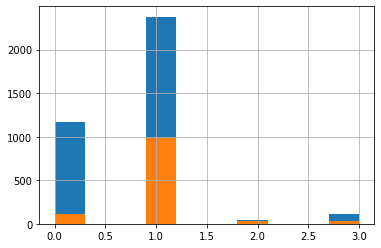

In [166]:
trainX.shape
evalX.shape
print(">>> trainY value_counts:")
pd.Series(trainY.flatten()).value_counts()
print(">>> evalY value_counts:")
pd.Series(evalY.flatten()).value_counts()
pd.Series(trainY.flatten()).hist()
pd.Series(evalY.flatten()).hist()


array([[   0,    1,    2,    3],
       [1166, 2378,   47,  114]])

<AxesSubplot:title={'center':'SMALL_CAR'}>

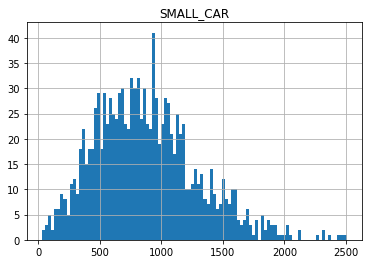

<AxesSubplot:title={'center':'MIDSIZE_CAR'}>

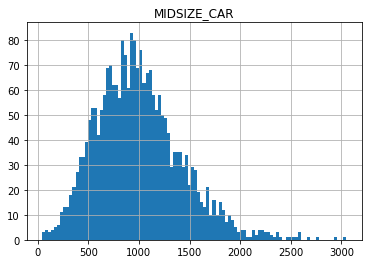

<AxesSubplot:title={'center':'LARGE_CAR'}>

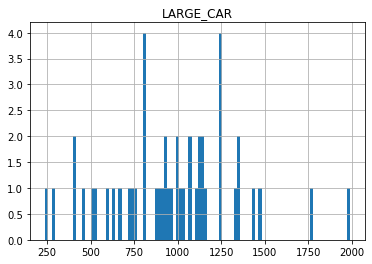

<AxesSubplot:title={'center':'VAN_TYPE'}>

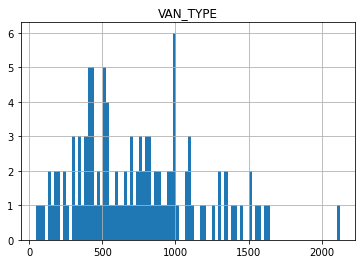

In [179]:
np.vstack(np.unique(trainY,return_counts=True))
for k,g in pd.DataFrame({"X_sum":np.sum(trainX,axis=1),"trainY":trainY.flatten()}).groupby("trainY"):
    ax = plt.axes()
    _ = ax.set_title(VL_TYPES[k])
    g["X_sum"].hist(bins=100, ax=ax)
    plt.show()

In [180]:
gb_cls = GradientBoostingClassifier(n_estimators=100, 
                                    max_depth=2, 
                                    min_samples_split=2, 
                                    learning_rate=0.1,
                                    verbose=1)
gb_cls.fit(trainX, trainY.flatten())
gb_cls.score(evalX, evalY.flatten())
predY = gb_cls.predict(evalX)



      Iter       Train Loss   Remaining Time 
         1           0.7836            1.85m
         2           0.7664            1.75m
         3           0.7481            1.73m
         4           0.7355            1.69m
         5           0.7247            1.68m
         6           0.7160            1.67m
         7           0.7103            1.65m
         8           0.7040            1.63m
         9           0.6987            1.60m
        10           0.6935            1.58m
        20           0.6593            1.40m
        30           0.6362            1.22m
        40           0.6195            1.04m
        50           0.6046           52.07s
        60           0.5895           41.43s
        70           0.5774           30.92s
        80           0.5619           20.58s
        90           0.5517           10.26s
       100           0.5437            0.00s


GradientBoostingClassifier(max_depth=2, verbose=1)

0.8235294117647058

In [182]:

resDF = pd.DataFrame({"pred":predY, "label":evalY.flatten()})
for k,g in resDF.groupby("label"):
    "{}={}".format(VL_TYPES[k],k), g.query("pred == label").shape[0], g.shape[0], g.query("pred == label").shape[0] / g.shape[0]
    
pd.Series(pred).value_counts()
pd.Series(label).value_counts()

('SMALL_CAR=0', 3, 110, 0.02727272727272727)

('MIDSIZE_CAR=1', 946, 982, 0.9633401221995926)

('LARGE_CAR=2', 1, 35, 0.02857142857142857)

('VAN_TYPE=3', 2, 29, 0.06896551724137931)

1    806
2     13
3     10
0      5
dtype: int64

1    982
0    110
2     35
3     29
dtype: int64

<AxesSubplot:title={'center':'SMALL_CAR'}>

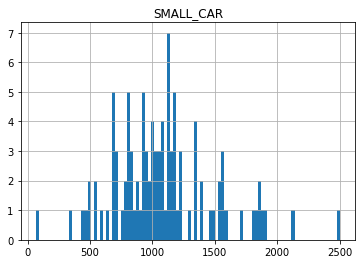

<AxesSubplot:title={'center':'MIDSIZE_CAR'}>

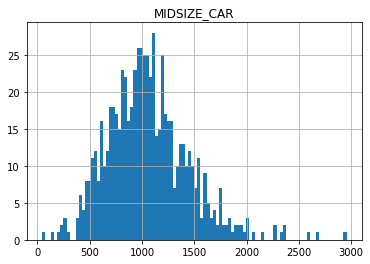

<AxesSubplot:title={'center':'LARGE_CAR'}>

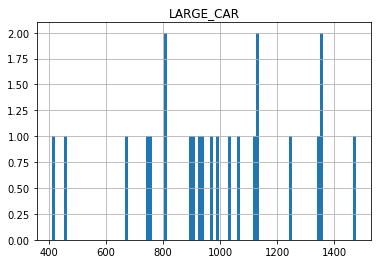

<AxesSubplot:title={'center':'VAN_TYPE'}>

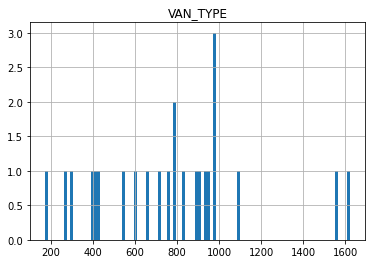

,type,total,tp,ue,oe
0,SMALL_CAR=0,101,"{'cnt': 1, 'ratio': 0.0099}","{'cnt': 0, 'ratio': 0.0}","{'cnt': 100, 'ratio': 0.9901}"
1,MIDSIZE_CAR=1,686,"{'cnt': 667, 'ratio': 0.9723}","{'cnt': 4, 'ratio': 0.0058}","{'cnt': 15, 'ratio': 0.0219}"
2,LARGE_CAR=2,23,"{'cnt': 2, 'ratio': 0.087}","{'cnt': 21, 'ratio': 0.913}","{'cnt': 0, 'ratio': 0.0}"
3,VAN_TYPE=3,24,"{'cnt': 2, 'ratio': 0.0833}","{'cnt': 22, 'ratio': 0.9167}","{'cnt': 0, 'ratio': 0.0}"


In [155]:
stacked = np.hstack([evalX,evalY,np.expand_dims(predY,-1)])
resDF = pd.DataFrame([{"X":line[:-2],"evalY":line[-2],"predY":line[-1]} for line in stacked])
resDF['X_sum'] = resDF["X"].apply(sum)

metricInfo = []
for k,g in resDF.groupby("evalY"):
    k = int(k)
    tp = g.query("predY == evalY").shape[0]
    ue = g.query("predY < evalY").shape[0]  # underestimate
    oe = g.query("predY > evalY").shape[0]  # overestimate
    total = g.shape[0]
    metricInfo.append({"type":VL_TYPES[k]+"="+str(k), 
                       "total":total,
                       "tp":{"cnt":tp,"ratio":round(tp/total,4)}, 
                       "ue":{"cnt":ue,"ratio":round(ue/total,4)}, 
                       "oe":{"cnt":oe,"ratio":round(oe/total,4)}})
    ax = plt.axes()
    _ = ax.set_title(VL_TYPES[k])
    g["X_sum"].hist(bins=100, ax=ax)
    plt.show()
pd.DataFrame(metricInfo)

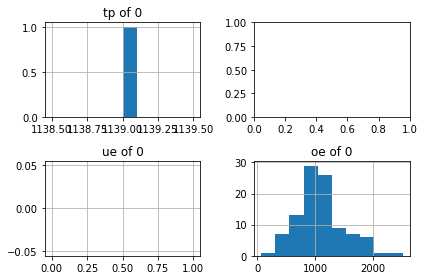

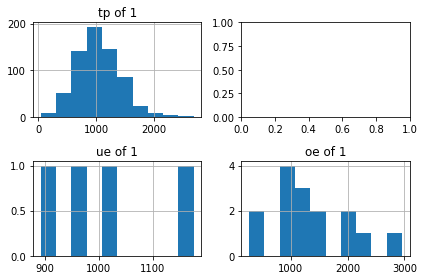

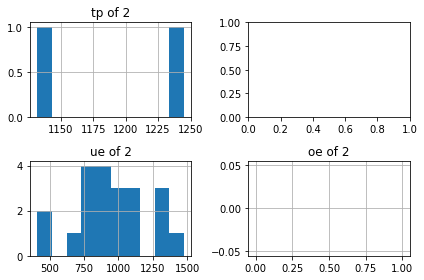

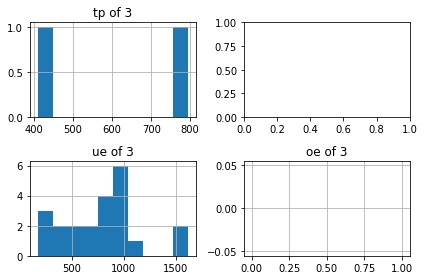

In [141]:
for cls_idx in [0,1,2,3]:
    fig,axes=plt.subplots(2,2)
    fig.set_tight_layout(True)
    resDF_tmp = resDF.query("evalY=={}".format(cls_idx))
    _=axes[0][0].set_title("tp of {}".format(cls_idx))
    _=resDF_tmp.query("predY == {}".format(cls_idx))["X_sum"].hist(ax=axes[0][0])
    _=axes[1][0].set_title("ue of {}".format(cls_idx))
    _=resDF_tmp.query("predY < {}".format(cls_idx))["X_sum"].hist(ax=axes[1][0])
    _=axes[1][1].set_title("oe of {}".format(cls_idx))
    _=resDF_tmp.query("predY > {}".format(cls_idx))["X_sum"].hist(ax=axes[1][1])

# WideDeep

In [ ]:
fc_emb = list()
fc_linear = list()
fc_num = list()
for fname in CATEGORICAL_COLUMNS:
    hash_col = feature_column.categorical_column_with_hash_bucket(fname, hash_bucket_size=10000, dtype=tf.string)
    id_col = feature_column.indicator_column(hash_col)
    fc_linear.append(id_col)

for fname in EMB_COLUMNS:
    hash_col = feature_column.categorical_column_with_hash_bucket(fname, hash_bucket_size=10000, dtype=tf.string)
    emb_col = feature_column.embedding_column(hash_col, dimension=6)
    fc_emb.append(emb_col)

for fname in NUMERIC_COLUMNS:
    fc_num.append(feature_column.numeric_column(fname, dtype=tf.float32))

In [ ]:
train_input_fn = functools.partial(getIter, trainDF)
eval_input_fn = functools.partial(getIter, evalDF)

wd_cls = tf.estimator.DNNLinearCombinedClassifier(linear_feature_columns=fc_linear,
                                                  dnn_feature_columns=fc_emb+fc_num,
                                                  dnn_hidden_units=[128,32],
                                                  n_classes=2)

_ = wd_cls.train(train_input_fn)
result = wd_cls.evaluate(eval_input_fn)

In [ ]:
print(">>> result:\n",result)

pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])
probs.plot(kind='hist', bins=20, title='predicted probabilities')

# WD custom

In [ ]:
fc_list = list()
for fname in CATEGORICAL_COLUMNS:
    hash_col = feature_column.categorical_column_with_hash_bucket(fname, hash_bucket_size=10000, dtype=tf.string)
    id_col = feature_column.indicator_column(hash_col)
    fc_list.append(id_col)

for fname in EMB_COLUMNS:
    hash_col = feature_column.categorical_column_with_hash_bucket(fname, hash_bucket_size=10000, dtype=tf.string)
    emb_col = feature_column.embedding_column(hash_col, dimension=6)
    fc_list.append(emb_col)

for fname in NUMERIC_COLUMNS:
    fc_list.append(feature_column.numeric_column(fname, dtype=tf.float32))



In [ ]:
from tensorflow.python.ops import init_ops


trainData = getIter(trainDF)
evData = getIter(evalDF)

#########
# Model
#########


def dnn_logits(features,n_classes,fc_emb,fc_num,mode):
    net = feature_column.input_layer(features, fc_emb+fc_num)
    for layer_id, num_hidden_units in enumerate([128,32]):
        with tf.variable_scope('hiddenlayer_%d' % layer_id
                               ) as hidden_layer_scope:
            net = tf.layers.dense(net, num_hidden_units, activation=tf.nn.relu,
                                  kernel_initializer=init_ops.glorot_uniform_initializer(),
                                  name=hidden_layer_scope)

    with tf.variable_scope('logits') as logits_scope:
        dnn_logits = tf.layers.dense(net, n_classes, kernel_initializer=init_ops.glorot_uniform_initializer(),
                                     activation=None,name=logits_scope)
    return dnn_logits

def linear_logits(features,n_classes,fc_linear,mode):
    net = feature_column.input_layer(features, fc_linear)
    linear_logits = tf.layers.dense(net, n_classes, activation=tf.nn.relu, name="linear_layer")
    return linear_logits


def model_fn(features,n_classes,fc_emb,fc_num,fc_linear,mode):
    with tf.variable_scope('dnn') as dnn_scope:
        dnn_scope_name = dnn_scope.name()
        dnn_logit = dnn_logits(features,n_classes,fc_emb,fc_num,mode)

    with tf.variable_scope('linear') as linear_scope:
        linear_scope_name = linear_scope.name
        linear_logits = linear_logits(features,n_classes,fc_linear,mode)

    logits = dnn_logits + linear_logits
    
    if mode.upper() =="EVAL":
        probabilities = tf.nn.softmax(logits)
        class_ids = tf.argmax(probabilities, 1)
        export_predictions = {
            "class_id": class_ids,
            "probabilities": probabilities,
        }
        export_outputs = {
            "predict": tf.estimator.export.PredictOutput(export_predictions)
        }
        return tf.estimator.EstimatorSpec(mode,
                                          predictions=export_predictions,
                                          export_outputs=export_outputs)
    
    if mode.upper() == "TRAIN":
        loss = tf.losses.sparse_softmax_cross_entropy(logits=logits, labels=lbls, reduction=tf.losses.Reduction.SUM)

        dnn_optimizer = tf.train.AdagradOptimizer(learning_rate=1e-3)
        _dnn_optimizer = tf.contrib.estimator.clip_gradients_by_norm(dnn_optimizer, clip_norm=50)
        linear_optimizer = tf.train.FtrlOptimizer(learning_rate=1e-4)
        
        train_ops=[
            _dnn_optimizer.minize(loss=loss, 
                                  var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope=dnn_scope_name)),
            linear_optimizer.minize(loss=loss, 
                                    var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope=linear_scope_name))
        ]
        train_op = tf.group(*train_ops)
        train_metric_ops = {"LOSS": tf.metrics.mean(gross_loss, name="mean_loss")}
        # Provide an estimator spec for `ModeKeys.TRAIN` modes.
        return tf.estimator.EstimatorSpec(mode=mode,
                                          loss=loss,
                                          train_op=train_op,
                                          eval_metric_ops=train_metric_ops)


# model_fn(...)

with tf.Session() as sess:
    net = feature_column.input_layer(trainData[0], fc_list)
    net.shape
    sess.run(tf.global_variables_initializer())
    lbls = trainData[1]
    net.eval()


